# Проект   
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    
       
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.    
       
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** выявить параметры, определяющие успешность игры.   
   
   Исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя каждого региона
 5. Проверка гипотез
 6. Общий вывод.

**Описание данных**   
+ Name — название игры   
+ Platform — платформа   
+ Year_of_Release — год выпуска   
+ Genre — жанр игры   
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)   
+ EU_sales — продажи в Европе (миллионы проданных копий)   
+ JP_sales — продажи в Японии (миллионы проданных копий)   
+ Other_sales — продажи в других странах (миллионы проданных копий)    
+ Critic_Score — оценка критиков (максимум 100)    
+ User_Score — оценка пользователей (максимум 10)    
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откройте файл с данными и изучите общую информацию. 

In [2]:
# подключаем библиотеки pandas, numpy, matplotlib и seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats as st
# округляем значения до трех знаков после запятой
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.simplefilter('ignore')

In [3]:
if os.path.exists(r'C:\Users\AHTOH\Desktop\Практикум\Проекты\games.csv'):
    df = pd.read_csv(r'C:\Users\AHTOH\Desktop\Практикум\Проекты\games.csv')
elif os.path.exists('/datasets/games.csv'):
    df = pd.read_csv('/datasets/games.csv')
else:
    print('Nothing works.')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000,16713,16715.000,16715.000,16715.000,16715.000,8137.000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.485,NaN,0.263,0.145,0.078,0.047,68.968,NaN,NaN
std,NaN,NaN,5.877,NaN,0.814,0.503,0.309,0.187,13.938,NaN,NaN
min,NaN,NaN,1980.000,NaN,0.000,0.000,0.000,0.000,13.000,NaN,NaN
25%,NaN,NaN,2003.000,NaN,0.000,0.000,0.000,0.000,60.000,NaN,NaN
50%,NaN,NaN,2007.000,NaN,0.080,0.020,0.000,0.010,71.000,NaN,NaN
75%,NaN,NaN,2010.000,NaN,0.240,0.110,0.040,0.030,79.000,NaN,NaN


**Первоначальные выводы:**   
+ названия колонок привести к к нижнему регистру
+ довольно много пропущенных значений в столбцах с оценками и рейтингом
+ изменить тип данных столбцов 	Year_of_Release(int), User_Score(float)    
+ в столбце "User_Score" чаще всего встречается значение "tbd"

## Предобработка данных

### Приведём названия столбцов к нижнему регистру

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропуски и дубликаты значений

In [7]:
# Проверим на явные дубликаты
df.duplicated().sum()

0

In [8]:
# определяем, в каких столбцах есть пропуски и считаем их
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# посчитаем количество пропусков в процентах
df.isna().mean()*100

name               0.012
platform           0.000
year_of_release    1.609
genre              0.012
na_sales           0.000
eu_sales           0.000
jp_sales           0.000
other_sales        0.000
critic_score      51.319
user_score        40.090
rating            40.479
dtype: float64

#### Столбец "name"

In [10]:
# посмотрим на строки с пропусками 'name'
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


**В этих строках нет никакой информации. Ни названия игры, ни жанра, ни оценок. Возможно пропуски появидись при переносе данных, хотя, учитывая прибыль с этих игр, данные не очень были важны. Поэтому удалим эти две строки.**

In [11]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Cтолбец "year_of_release"

**Пропуски в этом столбце возможно появились при переносе данных или пропущенные значения не заполнялись у малобюджетных игр, возможно по причине невнимательности заполнения.**

In [12]:
# посмотрим есть ли дубликаты в названиях игр
df.name.value_counts()

Need for Speed: Most Wanted                    12
Madden NFL 07                                   9
Ratatouille                                     9
FIFA 14                                         9
LEGO Marvel Super Heroes                        9
                                               ..
Monster! Bass Fishing                           1
Kuma-Tomo                                       1
Witches & Vampires: The Secrets of Ashburry     1
Vampire Night                                   1
Summon Night 2                                  1
Name: name, Length: 11559, dtype: int64

In [13]:
# выводим строки дубликатов в названии игр
df[df.name.duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3861,Frozen: Olaf's Quest,DS,2013.000,Platform,0.210,0.260,0.000,0.040,NaN,NaN,NaN
3357,Frozen: Olaf's Quest,3DS,2013.000,Platform,0.270,0.270,0.000,0.050,NaN,NaN,NaN
14656,007: Quantum of Solace,PC,2008.000,Action,0.010,0.010,0.000,0.000,70.000,6.3,T
9506,007: Quantum of Solace,DS,2008.000,Action,0.110,0.010,0.000,0.010,65.000,tbd,T
3119,007: Quantum of Solace,Wii,2008.000,Action,0.290,0.280,0.010,0.070,54.000,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
2582,pro evolution soccer 2011,PSP,2010.000,Sports,0.050,0.300,0.290,0.160,74.000,5.8,E
7148,pro evolution soccer 2011,Wii,2010.000,Sports,0.070,0.100,0.030,0.020,78.000,5.4,E
12647,pro evolution soccer 2011,PC,2010.000,Sports,0.000,0.050,0.000,0.010,79.000,NaN,NaN
15610,uDraw Studio: Instant Artist,X360,2011.000,Misc,0.010,0.010,0.000,0.000,54.000,5.7,E


In [14]:
df[df['name'] == 'World of Tanks']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6076,World of Tanks,PC,2011.000,Shooter,0.000,0.230,0.000,0.050,80.000,3.7,T
14683,World of Tanks,X360,NaN,Shooter,0.000,0.030,0.000,0.000,NaN,5.2,NaN


**Мы видим, что одна и та же игра выходила на разных платформах, поэтому заполним такие пропуски годом с другой платформы.**

In [15]:
df.year_of_release.fillna(df.groupby('name')['year_of_release'].transform('median'), inplace=True)

In [16]:
df[df['name'] == 'World of Tanks']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6076,World of Tanks,PC,2011.000,Shooter,0.000,0.230,0.000,0.050,80.000,3.7,T
14683,World of Tanks,X360,2011.000,Shooter,0.000,0.030,0.000,0.000,NaN,5.2,NaN


In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

**Наши пропуски сократились до 146. Дальше поищем игры в названии которых есть год и пропущенное значение в столбце "year_of_release".**

In [18]:
# создадим список с 1980 по 2016 в виде строк
list_years = [str(i) for i in range(1980, 2017)]

In [19]:
# соединим в переменной строки лет оперетором "или"
years_search = '|'.join(list_years)
# найдём в названии подстроку с годом и пустым значением в годе выхода игры
df[(df.name.str.contains(years_search)) & (df.year_of_release.isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.570,1.020,0.000,0.410,NaN,NaN,NaN
4774,NFL GameDay 2003,PS2,NaN,Sports,0.200,0.150,0.000,0.050,60.000,tbd,E
5654,All-Star Baseball 2005,PS2,NaN,Sports,0.160,0.120,0.000,0.040,72.000,8.6,E
8917,All-Star Baseball 2005,XB,NaN,Sports,0.110,0.030,0.000,0.010,75.000,8.8,E
13194,Tour de France 2011,X360,NaN,Racing,0.000,0.040,0.000,0.010,46.000,7.6,NaN
13928,Sega Rally 2006,PS2,NaN,Racing,0.000,0.000,0.040,0.000,NaN,NaN,NaN
16077,Football Manager 2007,X360,NaN,Sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN


**Заменим пропуски на год в названии игры -1, так как, как правило, игра выходит накануне нового года (например, FIFA 15 ИЛИ NHL 15 вышли в сентябре 2014 года)**

In [20]:
# создадим словарь с названиями игр и новыми значениями
dict1 = {}
for row in df[(df.name.str.contains(years_search)) & (df.year_of_release.isna())]['name']:
    dict1[row] = int(row.split()[-1]) - 1
dict1

{'wwe Smackdown vs. Raw 2006': 2005,
 'NFL GameDay 2003': 2002,
 'All-Star Baseball 2005': 2004,
 'Tour de France 2011': 2010,
 'Sega Rally 2006': 2005,
 'Football Manager 2007': 2006}

In [21]:
# теперь заменим пропуски на значения из словаря
for i in range(len(df)):
    if df['name'][i] in dict1:
        df['year_of_release'][i] = dict1[df['name'][i]]

In [22]:
# проверим, заменились ли значения
df[(df['name'] == 'Tour de France 2011') | (df['name'] == 'All-Star Baseball 2005')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5654,All-Star Baseball 2005,PS2,2004.000,Sports,0.160,0.120,0.000,0.040,72.000,8.6,E
8917,All-Star Baseball 2005,XB,2004.000,Sports,0.110,0.030,0.000,0.010,75.000,8.8,E
13194,Tour de France 2011,X360,2010.000,Racing,0.000,0.040,0.000,0.010,46.000,7.6,NaN


In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release     139
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [24]:
df.isna().mean()*100

name               0.000
platform           0.000
year_of_release    0.832
genre              0.000
na_sales           0.000
eu_sales           0.000
jp_sales           0.000
other_sales        0.000
critic_score      51.313
user_score        40.083
rating            40.471
dtype: float64

**У нас осталось 139 строк(0,83%). Учитывая, что оценивать мы будем по годам, эти строки нам не нужны. Заполнить их какими-либо значениями не представляется возможным, поэтому удалим их.**

In [25]:
df = df.dropna(subset=['year_of_release'])

In [26]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8495
user_score         6636
rating             6703
dtype: int64

**Изменим тип данных на int, всё-таки год - это целое число.**

In [27]:
df.year_of_release = df.year_of_release.astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       9938 non-null   object 
 10  rating           9871 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#### Столбец "rating"

**Пропуски в этом столбце появились из-за того, что организация работает с 1994 года, а значит игры, вышедшие раньше не оценивались.**

In [29]:
# посмотрим на уникальные значения столбца
df.rating.value_counts()

E       3961
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

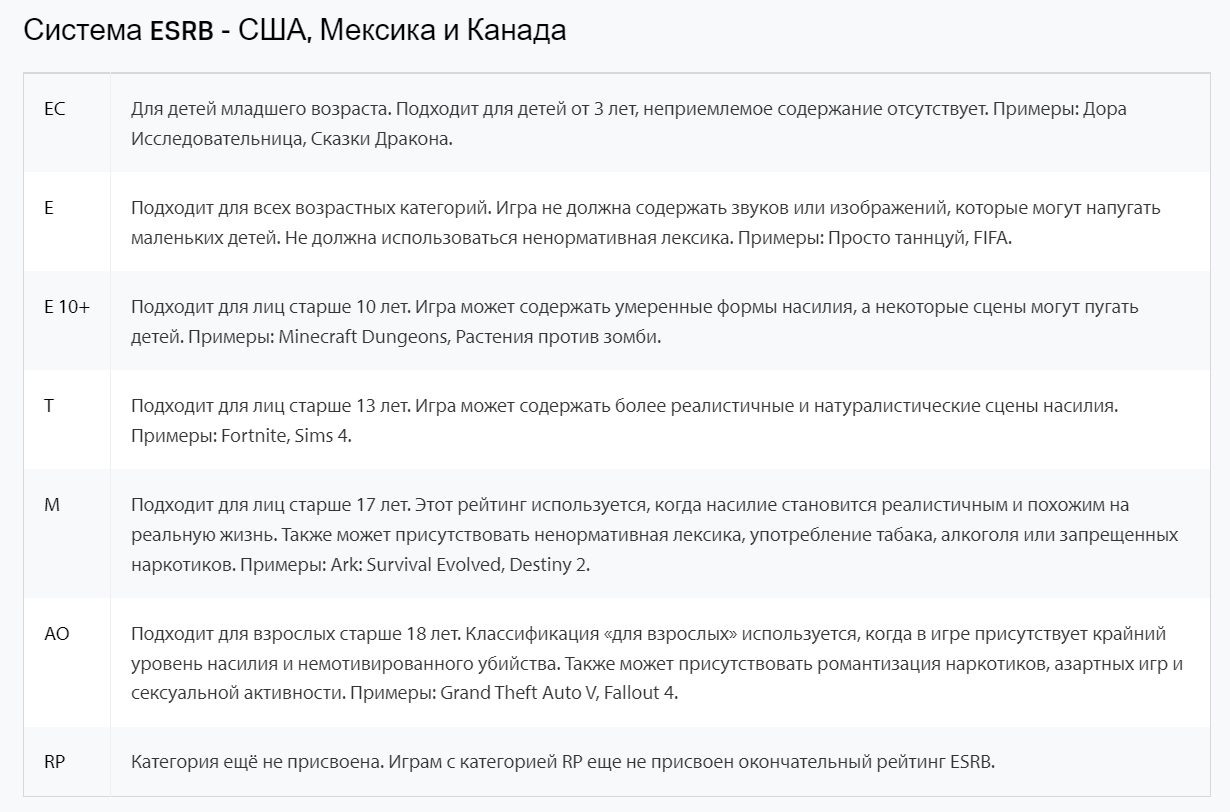

In [30]:
# в системе рейтинга отсутствует значение К-А, поэтому заменим его на NaN
df.rating.replace('K-A', np.nan, inplace=True)

In [31]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8495
user_score         6636
rating             6706
dtype: int64

In [32]:
df[df.name.duplicated(keep=False)].sort_values(by='name').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3357,Frozen: Olaf's Quest,3DS,2013,Platform,0.270,0.270,0.000,0.050,NaN,NaN,NaN
3861,Frozen: Olaf's Quest,DS,2013,Platform,0.210,0.260,0.000,0.040,NaN,NaN,NaN
3119,007: Quantum of Solace,Wii,2008,Action,0.290,0.280,0.010,0.070,54.000,7.5,T
9506,007: Quantum of Solace,DS,2008,Action,0.110,0.010,0.000,0.010,65.000,tbd,T
1284,007: Quantum of Solace,X360,2008,Action,0.820,0.510,0.010,0.140,65.000,7.1,T
14656,007: Quantum of Solace,PC,2008,Action,0.010,0.010,0.000,0.000,70.000,6.3,T
4474,007: Quantum of Solace,PS2,2008,Action,0.170,0.000,0.000,0.260,NaN,NaN,NaN
1784,007: Quantum of Solace,PS3,2008,Action,0.430,0.510,0.020,0.190,65.000,6.6,T
2242,007: The World is not Enough,PS,2000,Action,0.510,0.350,0.000,0.060,61.000,6.7,T
1203,007: The World is not Enough,N64,2000,Action,1.130,0.380,0.020,0.030,NaN,NaN,NaN


**Мы видим, что ситуация похожая. У одной и той же игры, где-то есть рейтинг, где-то нет. Заполним пропуски по аналогии со столбцом "year_of_release" насколько это возможно.**

In [33]:
df.rating = df.groupby('name')['rating'].transform('ffill')

In [34]:
df[df.name.duplicated(keep=False)].sort_values(by='name').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3357,Frozen: Olaf's Quest,3DS,2013,Platform,0.270,0.270,0.000,0.050,NaN,NaN,NaN
3861,Frozen: Olaf's Quest,DS,2013,Platform,0.210,0.260,0.000,0.040,NaN,NaN,NaN
3119,007: Quantum of Solace,Wii,2008,Action,0.290,0.280,0.010,0.070,54.000,7.5,T
9506,007: Quantum of Solace,DS,2008,Action,0.110,0.010,0.000,0.010,65.000,tbd,T
1284,007: Quantum of Solace,X360,2008,Action,0.820,0.510,0.010,0.140,65.000,7.1,T
14656,007: Quantum of Solace,PC,2008,Action,0.010,0.010,0.000,0.000,70.000,6.3,T
4474,007: Quantum of Solace,PS2,2008,Action,0.170,0.000,0.000,0.260,NaN,NaN,T
1784,007: Quantum of Solace,PS3,2008,Action,0.430,0.510,0.020,0.190,65.000,6.6,T
2242,007: The World is not Enough,PS,2000,Action,0.510,0.350,0.000,0.060,61.000,6.7,T
1203,007: The World is not Enough,N64,2000,Action,1.130,0.380,0.020,0.030,NaN,NaN,NaN


In [35]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8495
user_score         6636
rating             6417
dtype: int64

**Мы сократили количество пропусков на 236. <s>Остальные пропуски мы оставим, так как нет возможности их заполнить.**

**Остальные пропуски мы заполним значением "unknown"**

In [36]:
df.rating = df.rating.fillna('unknown')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8495
user_score         6636
rating                0
dtype: int64

#### Столбец "critic_score" 

**В этом столбце мы не сможем заполнить пропуски, потому что у каждой платформы разные оценки. Пропуски появились, возможно, у малобюджетных игр или игр с низкой прибылью. Их просто не оценивали критики.**

#### Столбец "user_score"

In [37]:
df.user_score.value_counts()

tbd    2395
7.8     324
8       288
8.2     279
8.3     253
       ... 
9.6       2
2.3       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [38]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Самое частовстречаемое значение, как мы уже видели ранее - tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Остальные значения числовые.**

**Причины появления пропусков возможны разные. Их могли не оценивать ползователи или в 80-90-х годах система рейтингов не сильно бвла распространнена, или, опять же, могла произойти ошибка при переносе данных. В любом случае значение "tbd" нужно заменить на "NaN". При заполнении иными значениями данные при анализе будут давать искажённые результаты.**

In [41]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       7543 non-null   float64
 10  rating           16574 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Добавление столбца по  суммарным продажам во всех регионах

In [43]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown


In [44]:
# добавим столбец "total_sales" сразу за колонкой "other_sales" для удобства)))
df.insert(8, 'total_sales', df.loc[:,'na_sales':'other_sales'].sum(axis=1))

In [45]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,82.540,76.000,8.000,E
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,40.240,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,35.520,82.000,8.300,E
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,32.770,80.000,8.000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,31.380,NaN,NaN,unknown


### Результат проделанной работы:    
1. Исправили названия столбцов.     
2. Обработаны пропуски:     
    2.1 Удалены строки с пропусками в столбцах 'name', 'year_of_release'.    
    2.2. Заполнены пропуски в "year_of_release" значением с других платформ (сколько возможно).    
    2.3. Заполнены пропуски в "rating" значением с других платформ (сколько возможно).   
    2.4. Пропуски в столбцах 'critic_score', 'user_score', 'rating' мы оставили.
3. Изменены типы данных:    
    + "year_of_release" - с float на int 
    + "user_score" - с object на float    
4. Создан новый столбец с суммарными продажами во всех регионах.

<font color="green" size="4">**Процент удалённых данных во время обработки - 0.84%**</font>

## Исследовательский анализ данных

### Количество игр в разные годы

In [46]:
df_games = df.groupby('year_of_release')['name'].agg(count='count')
df_games.head(20)

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [47]:
plt.style.use('fivethirtyeight')

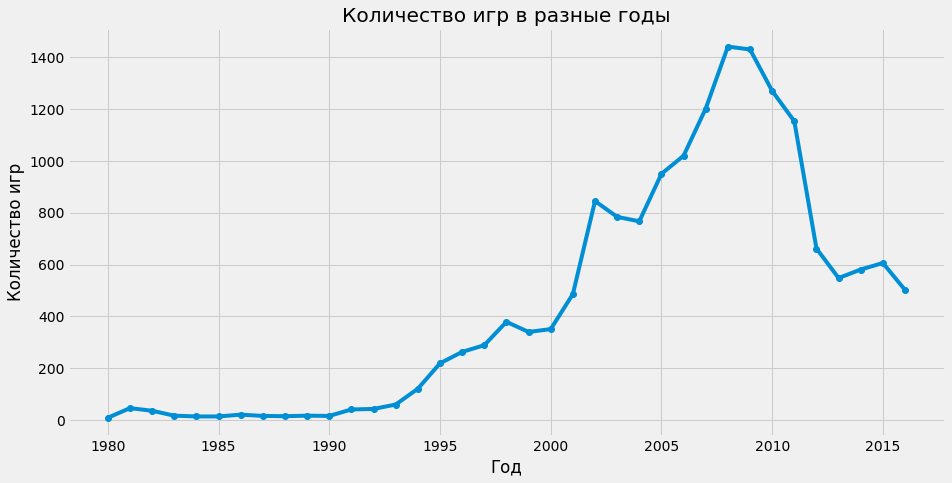

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(df_games['count'], 'o-')

plt.title('Количество игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр');

**Если мы посмотрим на график, то увидим незначительное количество игр в 80-е годы. Поэтому можно рассматривать период с 1993 года. Пик выпуска игр наблюдается в 2008-2009 годах, затем идёт спад.**

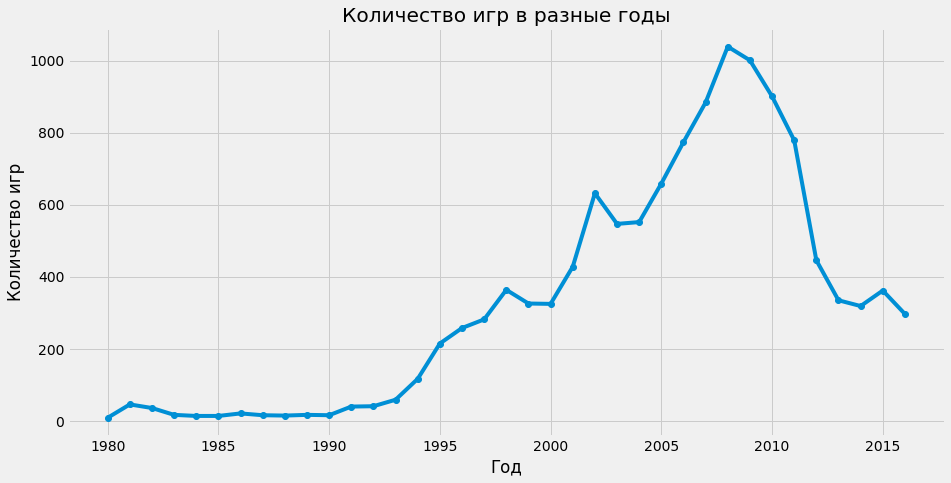

In [49]:
df_games_u = df.groupby('year_of_release')['name'].agg(count='nunique')
plt.figure(figsize=(14, 7))
plt.plot(df_games_u['count'], 'o-')

plt.title('Количество игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр');

###  Продажи по платформам

In [50]:
df_plf_ttl = df.groupby('platform')['total_sales'].agg(sum='sum').sort_values(by='sum', ascending=False)
df_plf_ttl.head(20)

,sum
platform,
PS2,1250.920
X360,966.670
PS3,935.190
Wii,903.310
DS,804.280
PS,727.580
PS4,314.140
GBA,313.730
PSP,293.570


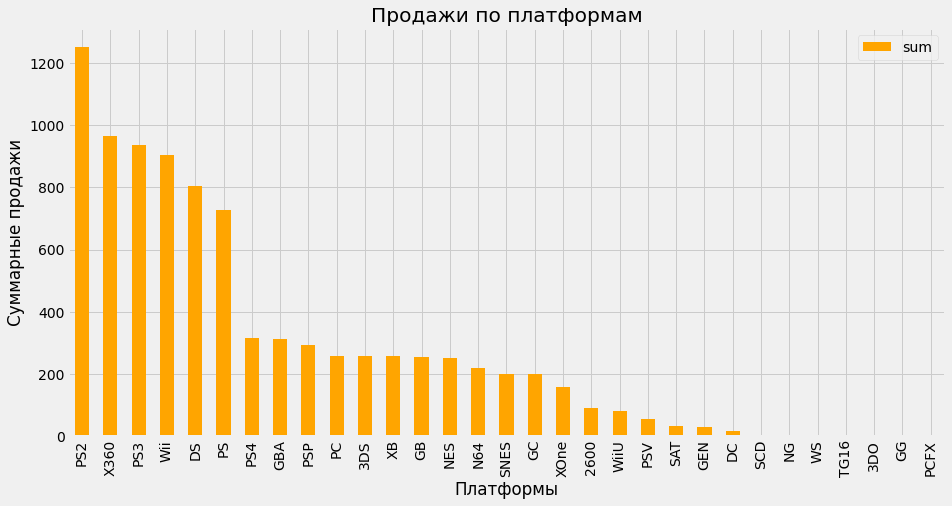

In [51]:
df_plf_ttl.plot(y='sum', kind='bar', color='orange', figsize=(14, 7))

plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

**Лидирует по продажам PS2. Но выделить можно 6 платформ. Построим по ним распределение по годам.**

In [52]:
best_plf = df_plf_ttl.reset_index().platform.head(6)
best_plf

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

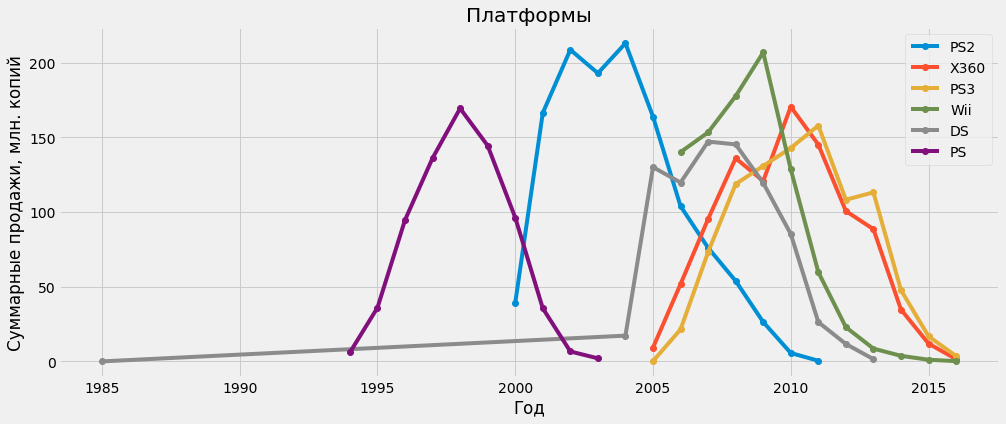

In [53]:
plt.figure(figsize=(15, 6))

for items in best_plf:
    d = df.query('platform == @items').groupby('year_of_release')['total_sales'].agg(sum='sum')
    plt.plot(d, 'o-')
plt.legend(best_plf)
plt.title('Платформы')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий');

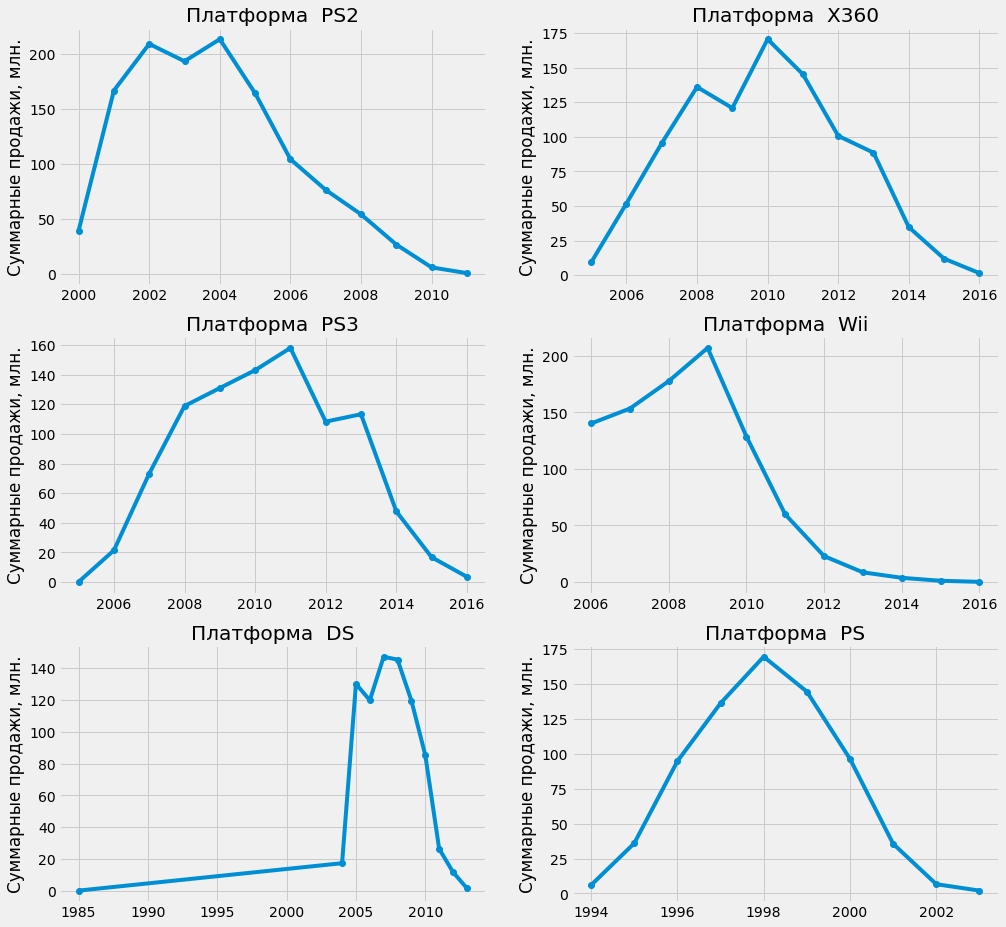

In [54]:
plt.figure(figsize=(15, 15))
count = 0
for items in best_plf:
    count += 1
    plt.subplot(3, 2, count)
    d = df.query('platform == @items').groupby('year_of_release')['total_sales'].agg(sum='sum')
    plt.plot(d, 'o-')
    plt.title(f'Платформа  {items}')
    plt.ylabel('Суммарные продажи, млн.');

**Если посмотреть на графики, можно определить среднюю продолжительность "жизни" определённой платформы. Она составляет около 10 лет. Правда есть вопросы по платформам DS (у неё начальное значение 1985 год) и Wii (не очень понятно, как платформа стартовала со 140 млн.)**

In [55]:
# посмотрим на количество игр DS
df.query('platform == "DS"').groupby('year_of_release')['name'].count()

year_of_release
1985      1
2004     23
2005    118
2006    201
2007    377
2008    494
2009    404
2010    324
2011    155
2012     24
2013      8
Name: name, dtype: int64

In [56]:
df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.000,0.000,0.020,0.000,0.020,NaN,NaN,unknown


**Консоль DS была выпущена в 2004 году в Канаде, США и Японии. А игра "Strongest Tokyo University Shogi DS" в мае 2010. Поэтому заменим год выпуска.**

In [57]:
df.loc[df['name'] == "Strongest Tokyo University Shogi DS", 'year_of_release'] = 2010

In [58]:
# посмотрим на количество игр Wii
df.query('platform == "Wii"').groupby('year_of_release')['name'].count()

year_of_release
2006     48
2007    187
2008    286
2009    325
2010    254
2011    146
2012     32
2013     12
2014      6
2015      4
2016      1
Name: name, dtype: int64

**В косоли Wii всё нормально. Это 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube. На старте продаж к ней вышло очень много игр, отсюда и большие продажи.**

**Теперь прсмотрим на примере Sony Interactive Entertainment за какой характерный срок появляются новые и исчезают старые платформы.**

In [59]:
# создадим список продуктов Sony Interactive Entertainment
lst_ps = list(df[df.platform.str.contains('PS')]['platform'].unique())
lst_ps

['PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV']

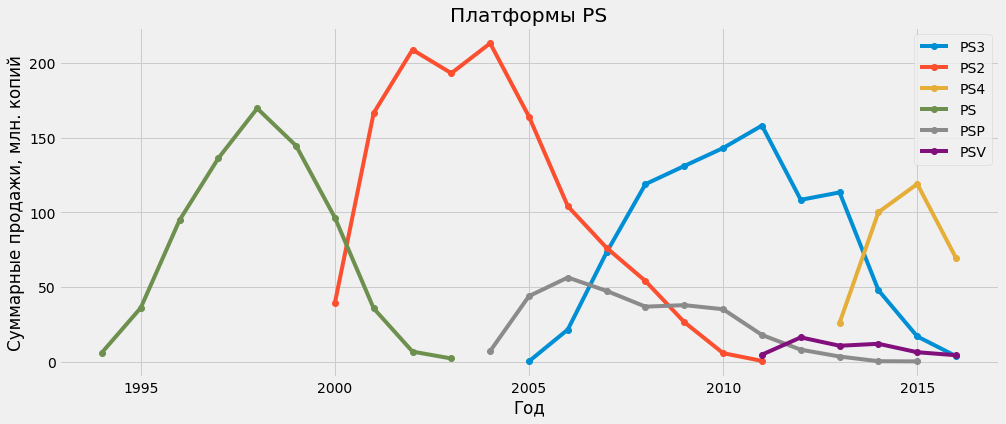

In [60]:
plt.figure(figsize=(15, 6))

for items in lst_ps:
    d = df.query('platform == @items').groupby('year_of_release')['total_sales'].agg(sum='sum')
    plt.plot(d, 'o-')
plt.legend(lst_ps)
plt.title('Платформы PS')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий');

In [61]:
# посчитаем срок "жизни" платформ
life_plf = df.query('platform in @lst_ps').groupby('platform')['year_of_release'].agg({'max', 'min'})
life_plf['life_span'] = life_plf['max'] - life_plf['min']
life_plf

,max,min,life_span
platform,,,
PS,2003,1994,9
PS2,2011,2000,11
PS3,2016,2005,11
PS4,2016,2013,3
PSP,2015,2004,11
PSV,2016,2011,5


<font color="green" size="5">**Вывод:**</font>        
**Как мы видим средний срок "жизни" платформы 10 лет (не учитываем PSV и PS4). 1 марта 2019 года Sony прекратила производство игр на носителях для PSV (8 лет). Игры для PS4 выходят до сих пор, хотя, PS5 выпущена 12 ноября 2020 года и PS4 уйдёт в прошлое.      
Как выдно на графике, при появлении консолей нового поколения, старые отходят на второй план. С момента запуска новой консоли до прекращения производства игр для старой проходит от 3 до 6 лет. В случае PS2 и PS3 - 6 лет.**

### Актуальный период для прогнозирования на 2017 год

**<s>Если мы посмотрим на график количества игр, то увидим сильное падение с 2009 по 2013 годы. Мы возмём период 2013-2015 годы, когда был небольшой подъём. В задании также упоминается, что данные за 2016 год могут быть неполными, поэтому мы их не будем учитывать.**

**Мы возмём период 2014-2016 годы.**

In [62]:
actual = df[(df['year_of_release'] > 2013) & (df['year_of_release'] <= 2016)]
actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   total_sales      1689 non-null   float64
 9   critic_score     718 non-null    float64
 10  user_score       888 non-null    float64
 11  rating           1689 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


**Посмотрим на суммарные продажи по платформам за актуальный период.**

In [63]:
actual_sales = actual.groupby('platform')['total_sales'].agg(sum='sum').sort_values(by='sum', ascending=False)
actual_sales

,sum
platform,
PS4,288.150
XOne,140.360
3DS,86.680
PS3,68.180
X360,48.220
WiiU,42.980
PC,27.050
PSV,22.400
Wii,5.070


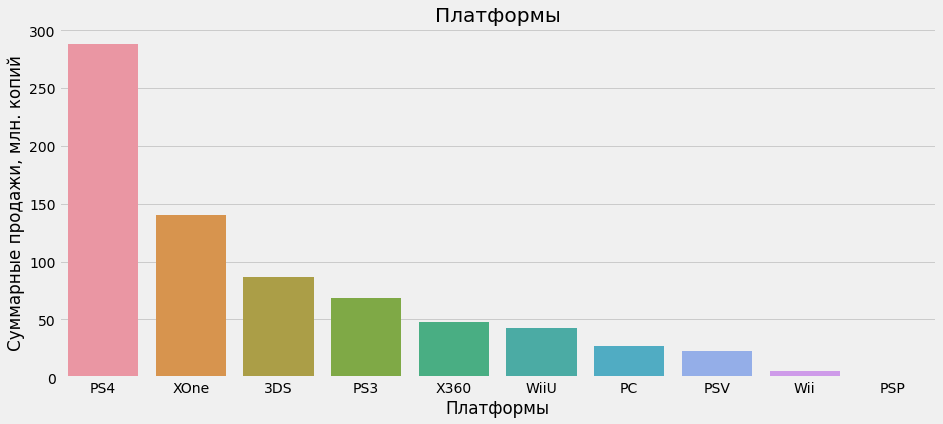

In [64]:
plt.figure(figsize=(14, 6))
sns.barplot(actual_sales.index, actual_sales['sum'])
plt.title('Платформы')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи, млн. копий');

**Теперь посмотрим на распределение продаж по годам.**

In [65]:
data = actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
data.columns = ['sum_2014', 'sum_2015', 'sum_2016']
data.sort_values(by='sum_2014')

,sum_2014,sum_2015,sum_2016
platform,,,
PSP,0.240,0.120,NaN
Wii,3.750,1.140,0.180
PSV,11.900,6.250,4.250
PC,13.280,8.520,5.250
WiiU,22.030,16.350,4.600
X360,34.740,11.960,1.520
3DS,43.760,27.780,15.140
PS3,47.760,16.820,3.600
XOne,54.070,60.140,26.150


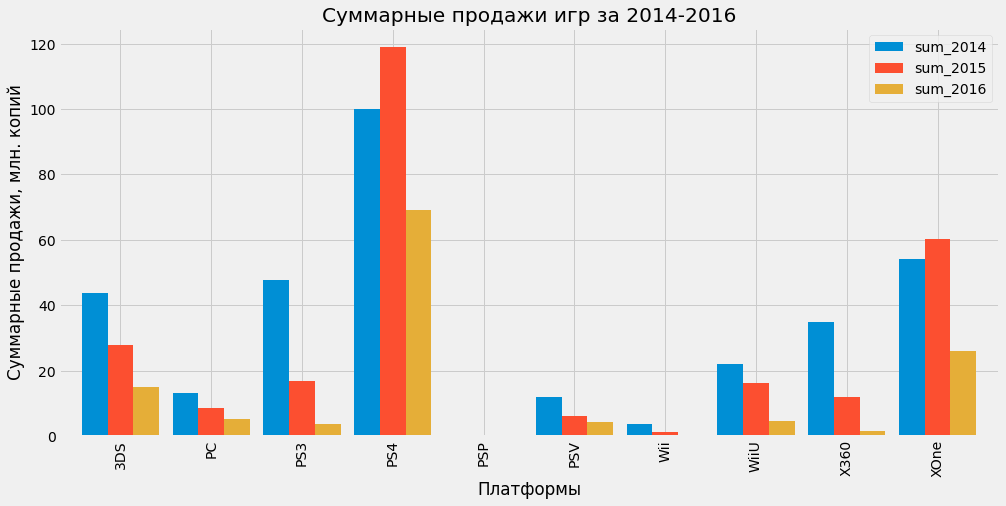

In [66]:
data.plot.bar(figsize=(15, 7), width=0.85)
plt.title('Суммарные продажи игр за 2014-2016')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи, млн. копий');

<font color="green" size="5">**Вывод:**</font>    
**По общим продажам лидирует PS4, на втором месте идёт XOne, третье место делят 3DS, четвертое - PS3, пятое - X360.      
Если посмотреть на графики мы увидим, что в 2014 году PS3 стремительно падает, а PS4, наоборот, растёт. С платформами от Microsoft та же история, X360 резко падает с 2014, а XOne растёт. 3DS также падает с 2014 года.     
Вообще из всех платформ растут только две (PS4 и XOne), у остальных продажи падают.       
Поэтому можно выделить пять самых прибыльных платформ, хотя потенциально прибыльные только две (игры для PS4 до сих пор прекрасно продаются и работает поддержка консоли, так же и для XOne, правды вышли новые версии XOne S, XONE X и XOne S All-Digital Edition). Есть ещё, конечно, платформа PC, которая не теряет своей актуальности по сей день (и вряд ли потеряет), но её мы рассматривать не будем.**

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [67]:
# создадим список платформ и датафрейм с ними
lst_top = ['PS4', 'PS3', 'X360', 'XOne', '3DS']
df_top_plf = actual.query('platform in @lst_top')

In [68]:
df_top_plf.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
count,1146,1146,1146.000,1146,1146.000,1146.000,1146.000,1146.000,1146.000,505.000,643.000,1146
unique,675,5,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,LEGO Marvel's Avengers,PS4,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
freq,5,376,NaN,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396
mean,NaN,NaN,2014.966,NaN,0.221,0.204,0.062,0.065,0.551,71.509,6.534,NaN
std,NaN,NaN,0.800,NaN,0.511,0.547,0.244,0.168,1.216,12.786,1.575,NaN
min,NaN,NaN,2014.000,NaN,0.000,0.000,0.000,0.000,0.010,19.000,0.200,NaN
25%,NaN,NaN,2014.000,NaN,0.000,0.000,0.000,0.000,0.050,65.000,5.700,NaN
50%,NaN,NaN,2015.000,NaN,0.040,0.040,0.000,0.010,0.140,73.000,6.900,NaN
75%,NaN,NaN,2016.000,NaN,0.190,0.160,0.050,0.050,0.480,80.000,7.700,NaN


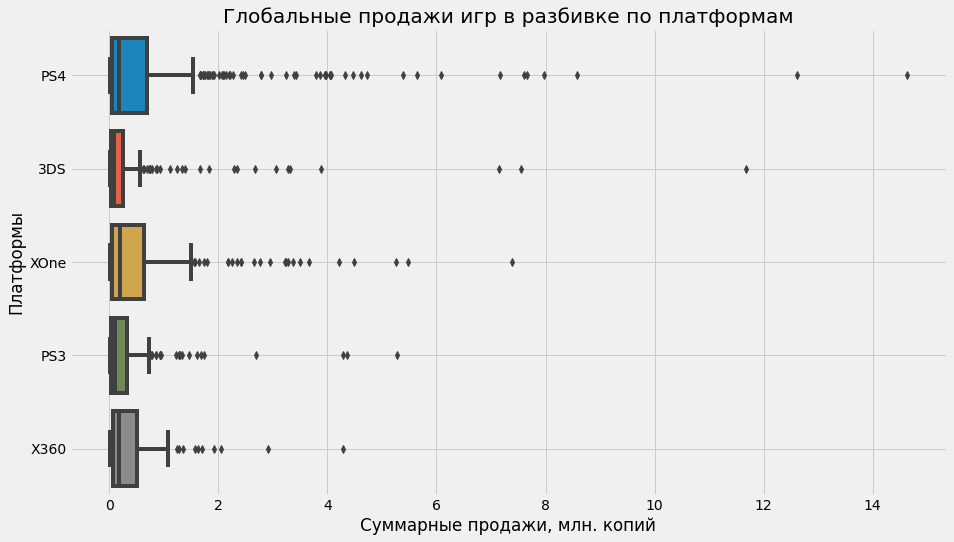

In [69]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='platform', data=df_top_plf)
plt.grid(True)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Платформы');

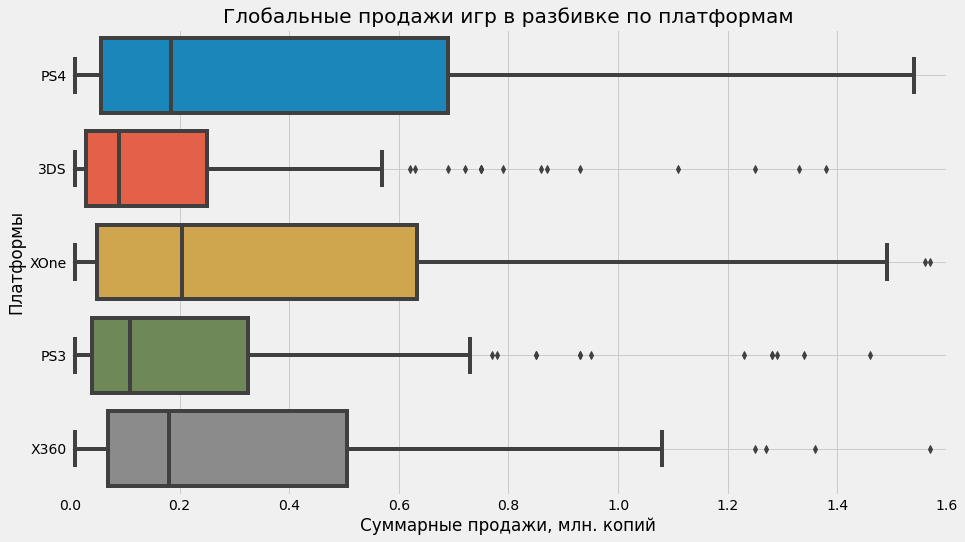

In [70]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='platform', data=df_top_plf)
plt.xlim(0, 1.6)
plt.grid(True)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Платформы');

<font color="green" size="5">**Вывод:**</font>   
**На графике видно, что лидирует по продажам три платформы - PS4, немного отстаёт XOne, затем X360. Видимо высокие показатели суммарных продаж платформ PS происходят за счёт выбросов, которые находятся за пределами median +/- 1.5*(q75 - q25).**

### Отзывы пользователей и критиков

In [71]:
plt.style.use('seaborn')

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

**Стрить графики будем для наших пяти платформ.**

In [72]:
# напишем функцию для графика
def reviews(pl, col):    
    df_cut_plf = df_top_plf[df_top_plf['platform'] == pl]
    return sns.jointplot(df_cut_plf['total_sales'], df_cut_plf[col], kind='reg')

In [73]:
# напишем функцию для вывода корреляции
def coor_rev(plf, c_u):
    df_cut_rev = df_top_plf[df_top_plf['platform'] == plf]
    cor = df_cut_rev['total_sales'].corr(df_cut_rev[c_u])
    return f'Корреляция между продажами и {c_u} равна: {cor:.3f}'

#### <font color="blue" size="5">**"PS3"**</font>  

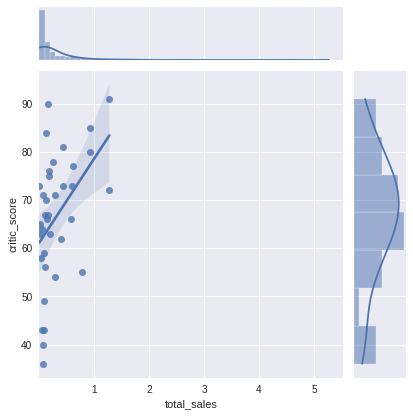

In [74]:
reviews('PS3', 'critic_score');

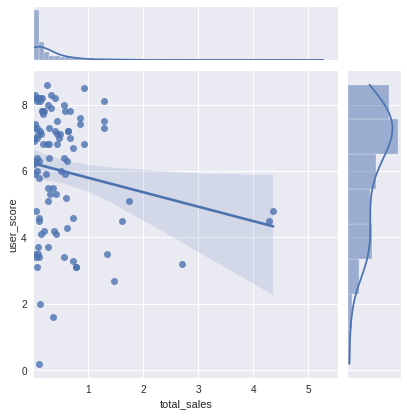

In [75]:
reviews('PS3', 'user_score');

In [76]:
coor_rev('PS3', 'critic_score')

'Корреляция между продажами и critic_score равна: 0.447'

In [77]:
coor_rev('PS3', 'user_score')

'Корреляция между продажами и user_score равна: -0.167'

<s>**Для "PS3" присутствует небольшая положительная корреляция по отзывам критиков. По отзывам пользователей еорреляция отсутствует.**

**Для "PS3" присутствует небольшая положительная корреляция по отзывам критиков. По отзывам пользователей очень слабая отрицательная корреляция.**

#### <font color="blue" size="5">**"X360"**</font>  

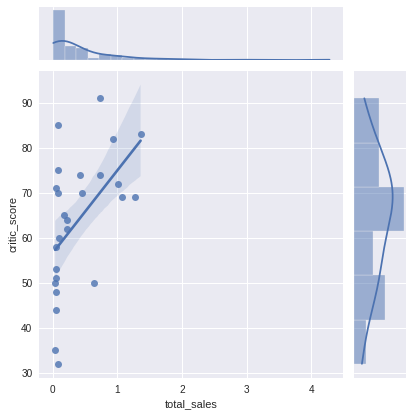

In [78]:
reviews('X360', 'critic_score');

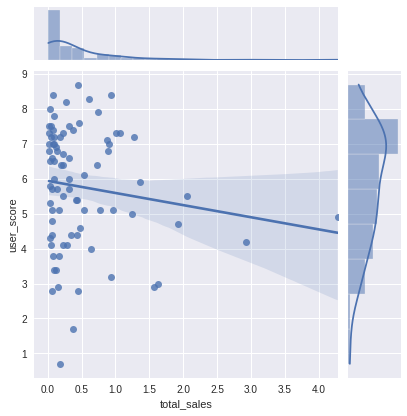

In [79]:
reviews('X360', 'user_score');

In [80]:
coor_rev('X360', 'critic_score')

'Корреляция между продажами и critic_score равна: 0.526'

In [81]:
coor_rev('X360', 'user_score')

'Корреляция между продажами и user_score равна: -0.138'

<s>**Ситуация похожая: для "X360" присутствует небольшая положительная корреляция по отзывам критиков. По отзывам пользователей еорреляция отсутствует.**

**Ситуация похожая: для "X360" присутствует средняя положительная корреляция по отзывам критиков. По отзывам пользователей очень слабая отрицательная корреляция.**

#### <font color="blue" size="5">**"PS4"**</font>  

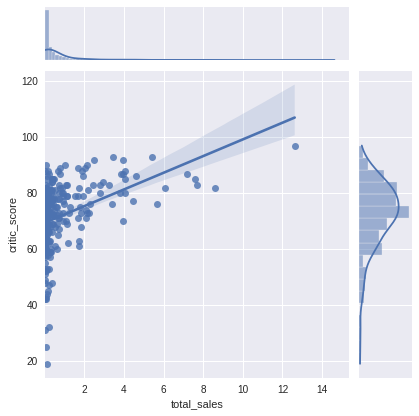

In [82]:
reviews('PS4', 'critic_score');

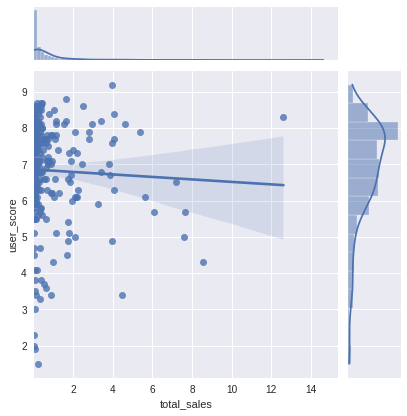

In [83]:
reviews('PS4', 'user_score');

In [84]:
coor_rev('PS4', 'critic_score')

'Корреляция между продажами и critic_score равна: 0.403'

In [85]:
coor_rev('PS4', 'user_score')

'Корреляция между продажами и user_score равна: -0.040'

**Для "PS4" присутствует небольшая положительная корреляция по отзывам критиков. По отзывам пользователей корреляция отсутствует.**

#### <font color="blue" size="5">**"3DS"**</font>  

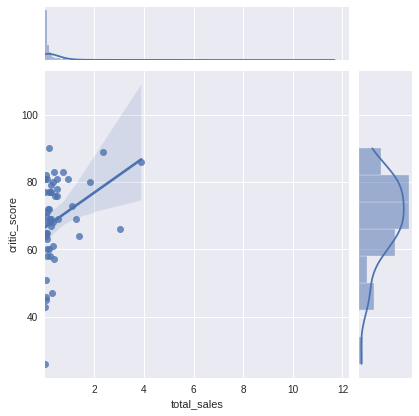

In [86]:
reviews('3DS', 'critic_score');

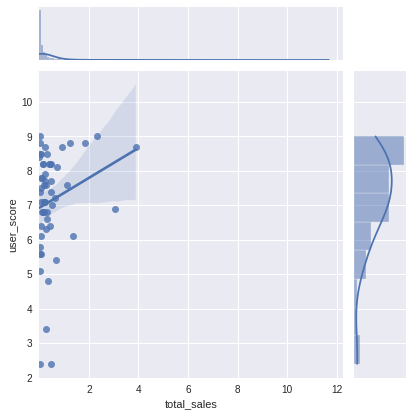

In [87]:
reviews('3DS', 'user_score');

In [88]:
coor_rev('3DS', 'critic_score')

'Корреляция между продажами и critic_score равна: 0.314'

In [89]:
coor_rev('3DS', 'user_score')

'Корреляция между продажами и user_score равна: 0.215'

**Для "3DS" присутствует небольшая положительная корреляция по отзывам критиков. По отзывам пользователей также небольшая положительная корреляция.**

#### <font color="blue" size="5">**"XOne"**</font>  

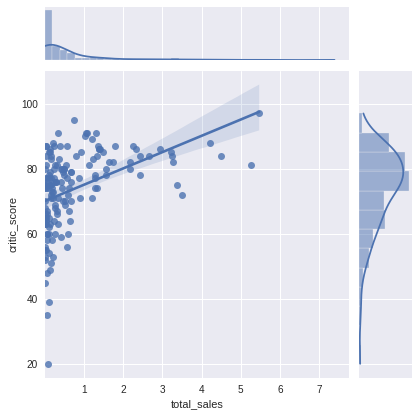

In [90]:
reviews('XOne', 'critic_score');

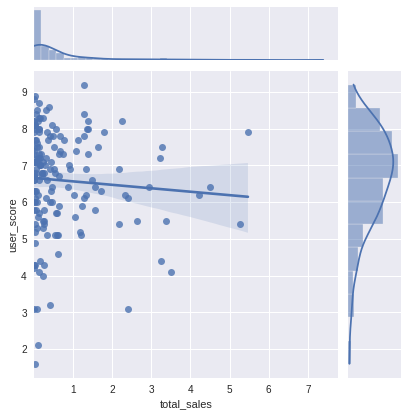

In [91]:
reviews('XOne', 'user_score');

In [92]:
coor_rev('XOne', 'critic_score')

'Корреляция между продажами и critic_score равна: 0.429'

In [93]:
coor_rev('XOne', 'user_score')

'Корреляция между продажами и user_score равна: -0.070'

<font color="green" size="5">**Вывод:**</font>   
<s>**На графиках и при расчете корреляции видно, что присутствует положительная корреляция по отзывам критиков. По отзывам пользователей корреляция отсутствует.      
Причём самые высокие коэффициенты у наших лидеров по прожажам. То есть зависимость налицо - чем выше отзывы критиков, тем больше продажи.        
Оценки критиков гораздо важнее оценок пользователей.**

<font color="green" size="5">**Вывод:**</font>   
**На графиках и при расчете корреляции видно, что присутствует положительная корреляция по отзывам критиков. По отзывам пользователей корреляция довольно слабая, и то не у всех платформ.      
То есть зависимость налицо - чем выше отзывы критиков, тем больше продажи.        
Оценки критиков гораздо важнее оценок пользователей.**

### Общее распределение игр по жанрам

In [94]:
plt.style.use('fivethirtyeight')

In [95]:
df_genre_ttl = df.groupby('genre')['total_sales'].agg(sum='sum').sort_values(by='sum', ascending=False)
df_genre_ttl

,sum
genre,
Action,1735.630
Sports,1327.590
Shooter,1050.020
Role-Playing,931.770
Platform,826.030
Misc,794.410
Racing,725.910
Fighting,446.590
Simulation,388.460


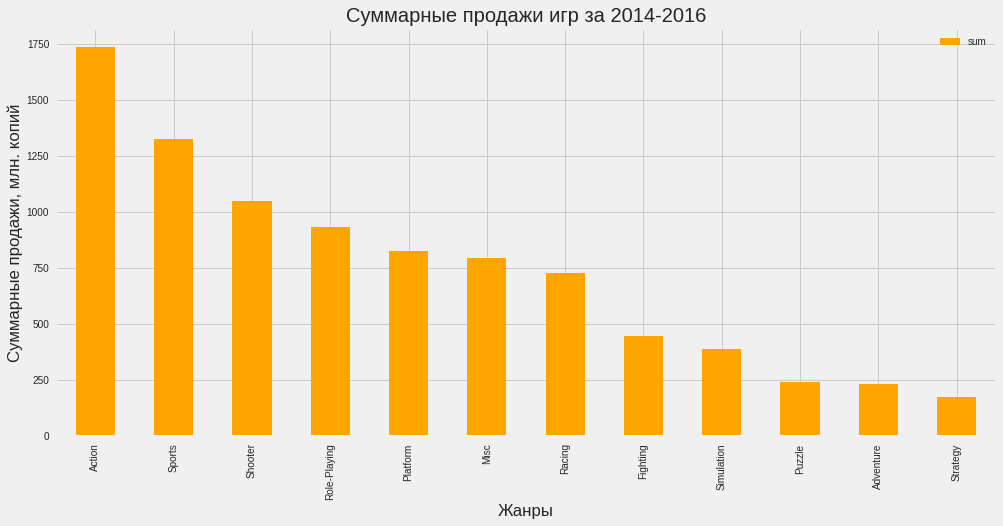

In [96]:
df_genre_ttl.plot.bar(figsize=(15, 7), color='orange')
plt.title('Суммарные продажи игр за 2014-2016')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи, млн. копий');

<font color="green" size="5">**Вывод:**</font>   
**На графике видно, что лидирует по продажам жанр "Action", за ним "Sports", затем "Shooter". На последних местах "Puzzle", "Adventure" и "Strategy".**

<font color="blue" size="6">**Исправления**</font>   

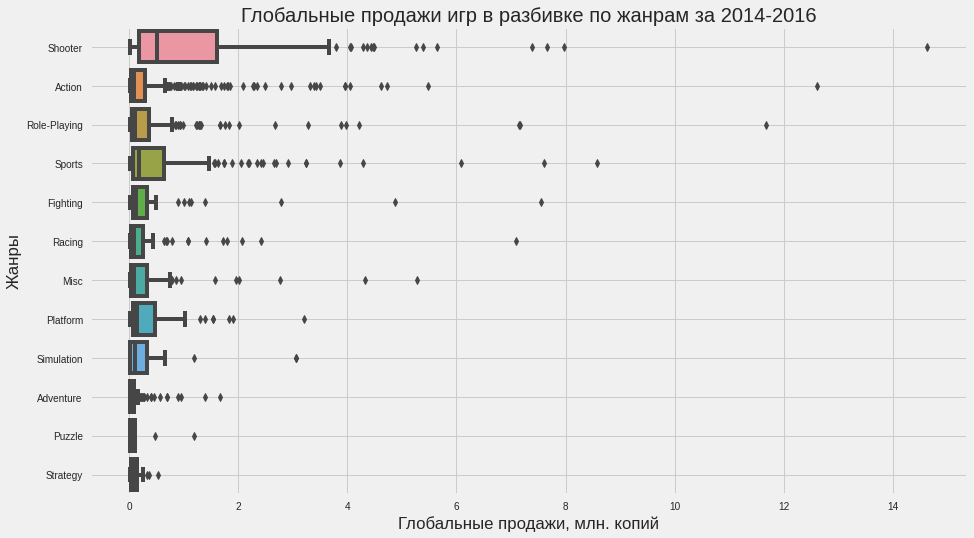

In [112]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='genre', data=actual)
plt.grid(True)
plt.title('Глобальные продажи игр в разбивке по жанрам за 2014-2016')
plt.xlabel('Глобальные продажи, млн. копий')
plt.ylabel('Жанры');

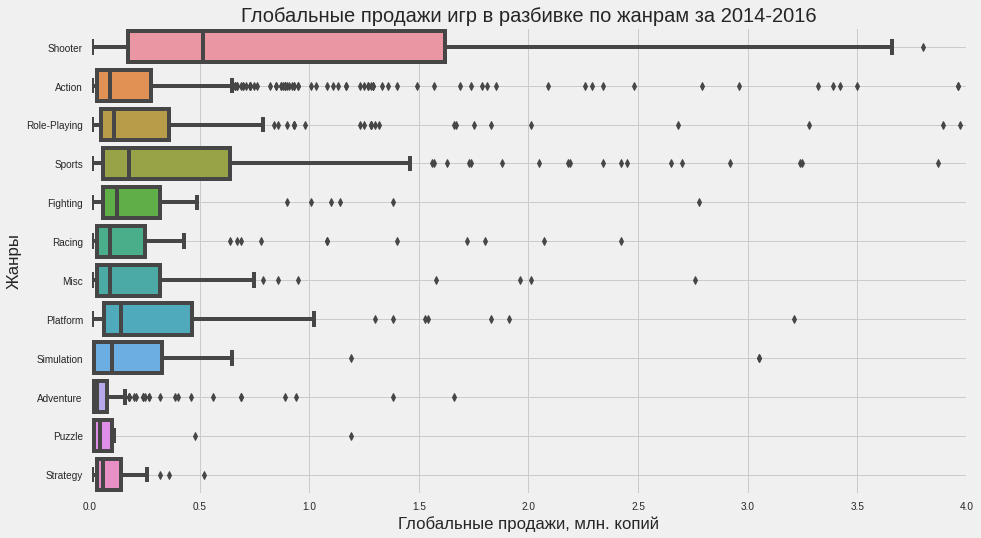

In [113]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='genre', data=actual)
plt.grid(True)
plt.xlim(0, 4)
plt.title('Глобальные продажи игр в разбивке по жанрам за 2014-2016')
plt.xlabel('Глобальные продажи, млн. копий')
plt.ylabel('Жанры');

In [99]:
df_genre_ttl_new = actual.groupby('genre')['total_sales'].agg(median='median').sort_values(by='median', ascending=False)
df_genre_ttl_new

,median
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


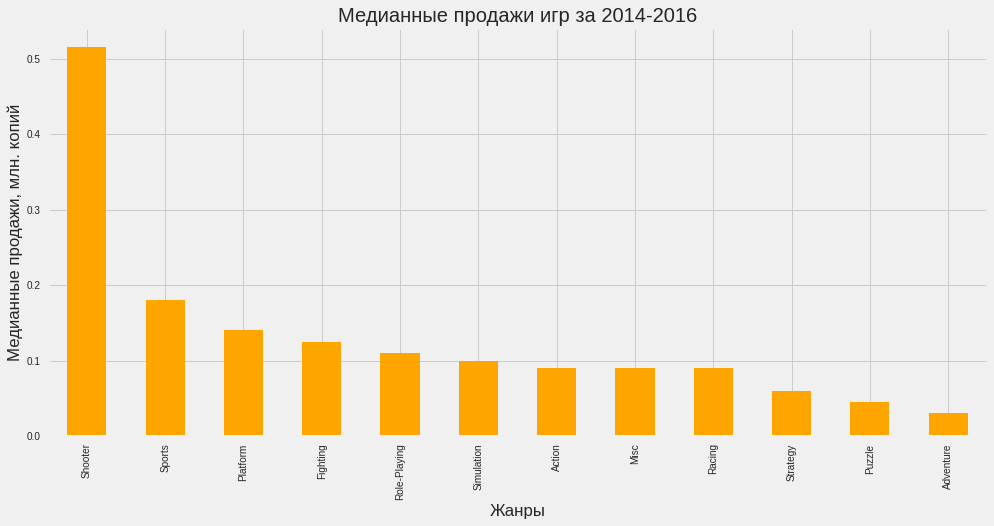

In [120]:
df_genre_ttl_new.plot.bar(figsize=(15, 7), color='orange', legend=None)
plt.title('Медианные продажи игр за 2014-2016')
plt.xlabel('Жанры')
plt.ylabel('Медианные продажи, млн. копий');

In [101]:
actual.query('genre == "Shooter" and total_sales > 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,14.630,NaN,NaN,unknown
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.990,3.490,0.220,1.280,7.980,NaN,NaN,unknown
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.810,3.480,0.140,1.230,7.660,83.000,5.700,M
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.590,2.110,0.010,0.680,7.390,NaN,NaN,unknown


In [102]:
actual.query('genre == "Sports" and total_sales > 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
77,FIFA 16,PS4,2015,Sports,1.120,6.120,0.060,1.280,8.580,82.000,4.300,E
94,FIFA 17,PS4,2016,Sports,0.660,5.750,0.080,1.110,7.600,85.000,5.000,E
143,FIFA 15,PS4,2014,Sports,0.800,4.330,0.050,0.900,6.080,82.000,5.700,E


<font color="green" size="5">**Вывод:**</font>   
         
**На графике видно, что с большим отрывом лидирует по продажам жанр "Shooter", за ним "Sports", затем "Platform". На последних местах "Puzzle", "Adventure".**      
**За счет таких серий игр, как "Call of Duty" распределение значений жанра "Shooter" будет иметь положительную скошенность. Также и в жанре "Sports" за счет серии игр "FIFA". Это говорит нам о том, что продавать игры этих жанров выгоднее (особенно шутеры, учитывая, его огромный отрыв). То есть успешность игр во многом зависит от жанра.**

*Ну и забегая вперёд, можно отметить, что топовые игры с большими продажами выходять на PS4. Также на примерах этих двух серий можно увидеть предпочтения по регионам.*

<font color="blue" size="5">**Общий вывод по исследовательскому анализу данных:**</font>    

+ Подъём по продажам игр наблюдается с 1993 года. Пик выпуска игр наблюдается в 2008-2009 годах, затем идёт спад.
+ Лидирует по продажам в период 1993-2016 - PS2. Но выделить можно 6 платформ. Средний срок "жизни" платформы 10 лет. При появлении консолей нового поколения, старые отходят на второй план. С момента запуска новой консоли до прекращения производства игр для старой проходит от 3 до 6 лет.       
+ Актуальный период для анализа был выбран 2013-2015. Выделили пять самых прибыльных платформ, хотя потенциально прибыльные только две (PS4 и XOne)     
+ лидирует по продажам три платформы - PS4, немного отстаёт XOne, затем X360.      
+ Оценки критиков гораздо важнее оценок пользователей.
+ лидирует по продажам жанр "Shooter", за ним "Sports", затем "Platform".

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [103]:
df_plf_sales = actual.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].agg('sum')
df_plf_sales

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.640,16.120,44.240
PC,7.230,17.970,0.000
PS3,22.050,25.540,11.220
PS4,98.610,130.040,15.020
PSP,0.000,0.000,0.360
PSV,2.520,3.530,14.540
Wii,2.080,2.590,0.000
WiiU,19.360,13.150,7.310
X360,28.300,15.490,0.080


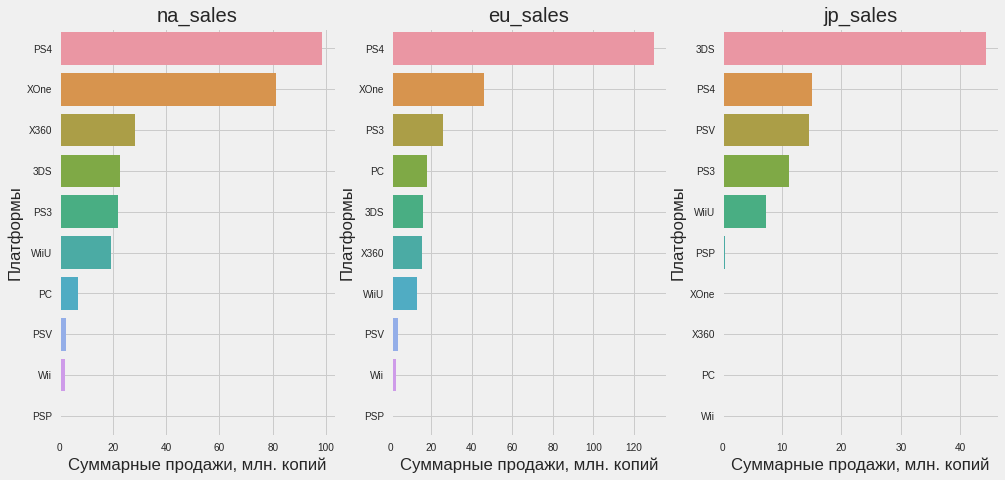

In [104]:
plt.figure(figsize=(15, 7))
count = 0
for col in df_plf_sales:
    count += 1
    plt.subplot(1, 3, count)
    sns.barplot(df_plf_sales[col], df_plf_sales.index, order=df_plf_sales\
                .sort_values(col, ascending=False).index)
    plt.title(col)
    plt.xlabel('Суммарные продажи, млн. копий')
    plt.ylabel('Платформы')
    plt.grid(True);

In [105]:
# посчитаем доли продаж игр по платформам по регионам
for col in df_plf_sales:
    print('\n')
    for p in df_plf_sales.index:
        interest = float(df_plf_sales.query('platform == @p')[col] / df_plf_sales[col].sum())
        print(f'Доля продаж платформы {p} в регионе {col} равна {interest:.2%}')



Доля продаж платформы 3DS в регионе na_sales равна 7.97%
Доля продаж платформы PC в регионе na_sales равна 2.55%
Доля продаж платформы PS3 в регионе na_sales равна 7.76%
Доля продаж платформы PS4 в регионе na_sales равна 34.71%
Доля продаж платформы PSP в регионе na_sales равна 0.00%
Доля продаж платформы PSV в регионе na_sales равна 0.89%
Доля продаж платформы Wii в регионе na_sales равна 0.73%
Доля продаж платформы WiiU в регионе na_sales равна 6.82%
Доля продаж платформы X360 в регионе na_sales равна 9.96%
Доля продаж платформы XOne в регионе na_sales равна 28.61%


Доля продаж платформы 3DS в регионе eu_sales равна 5.96%
Доля продаж платформы PC в регионе eu_sales равна 6.64%
Доля продаж платформы PS3 в регионе eu_sales равна 9.44%
Доля продаж платформы PS4 в регионе eu_sales равна 48.04%
Доля продаж платформы PSP в регионе eu_sales равна 0.00%
Доля продаж платформы PSV в регионе eu_sales равна 1.30%
Доля продаж платформы Wii в регионе eu_sales равна 0.96%
Доля продаж платформы W

**Для геймеров Северной Америки самые популярные платформы: PS4, X360, XOne, PS3, 3DS. На продажи оказывает влияние американская компания Microsoft, выпускающая консоли Xbox.**     
**Для геймеров Европы самые популярные платформы: PS4, PS3, XOne, X360, 3DS.**    
**Для геймеров Японии самые популярные платформы: 3DS, PS3, PSV, PS4, WiU. На продажи оказывает влияние японская компания Nintendo. К тому же японцы всегда всё на ходу делают. Отсюда и популярность игр для портативных консолей.**    
**А что касается платформ Sony Interactive Entertainment, то это транснациональная компания с офисом в США, дочерняя компания японской Sony Group Corporation, занимающаяся распостранением своей продукции по всему миру.**

### Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [106]:
df_gen_sales = actual.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].agg('median')
df_gen_sales

,na_sales,eu_sales,jp_sales
genre,,,
Action,0.010,0.020,0.010
Adventure,0.000,0.000,0.010
Fighting,0.040,0.020,0.030
Misc,0.010,0.010,0.010
Platform,0.075,0.055,0.000
Puzzle,0.000,0.000,0.030
Racing,0.030,0.050,0.000
Role-Playing,0.020,0.010,0.050
Shooter,0.220,0.220,0.000


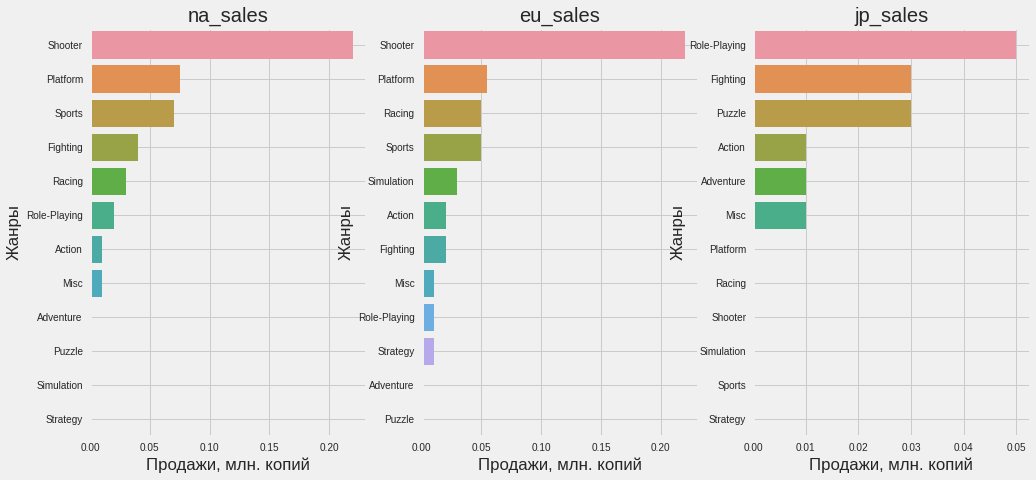

In [107]:
plt.figure(figsize=(15, 7))
count = 0
for col in df_gen_sales:
    count += 1
    plt.subplot(1, 3, count)
    sns.barplot(df_gen_sales[col], df_gen_sales.index, order=df_gen_sales\
                .sort_values(col, ascending=False).index)
    plt.title(col)
    plt.xlabel('Продажи, млн. копий')
    plt.ylabel('Жанры')
    plt.grid(True);

**Для геймеров Северной Америки самые популярные жанры: Shooter, Platform, Sports, Fighting, Racing.**     
**Для геймеров Европы список самых популярных жанров немного отличается: Shooter, Platform, Racing, Sports, Simulation.**    
**Для геймеров Японии жанры отличаются: RPG, Fighting, Puzzle, Action, Adventure.**  
**Разница в выборе жанров обусловлена огромной разницей во всех сферах между Западом и Востоком, это как две разные планеты.**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [108]:
df_rat_sales = actual.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].agg('sum')
df_rat_sales

,na_sales,eu_sales,jp_sales
rating,,,
E,50.760,58.270,8.980
E10+,34.590,27.410,4.740
M,101.960,99.190,8.450
T,40.030,34.950,15.910
unknown,56.720,50.860,55.010


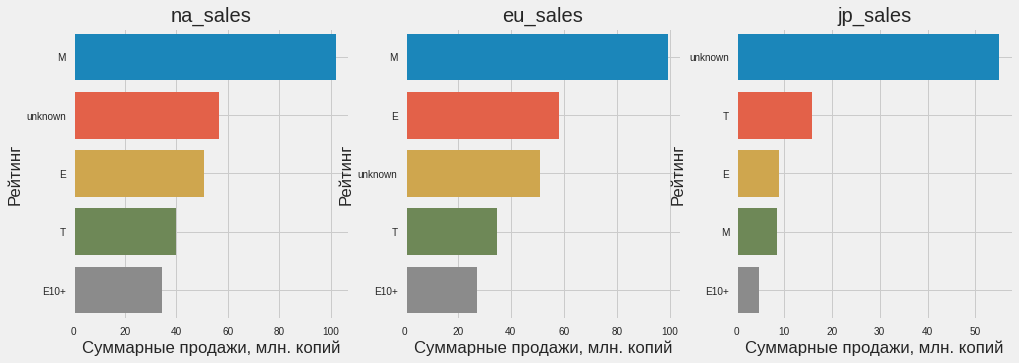

In [109]:
plt.figure(figsize=(15, 5))
count = 0
for col in df_rat_sales:
    count += 1
    plt.subplot(1, 3, count)
    sns.barplot(df_rat_sales[col], df_rat_sales.index, order=df_rat_sales\
                .sort_values(col, ascending=False).index)
    plt.title(col)
    plt.xlabel('Суммарные продажи, млн. копий')
    plt.ylabel('Рейтинг')
    plt.grid(True);

**Для геймеров Северной Америки и Европы самые популярные игры с рейтингом "М" (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.)**    
     
**Для геймеров Японии самые популярные игры с рейтингом "unknown". Причина этому, то что организация ESRB определяет рейтинг для игр в США и Канаде. А для Японии существует своя национальная организация CERO.**    
       
**По той же причине в остальных регионах. В Европе своя организация - Pan European Game Information (PEGI). То есть в Америке могут играть в европейские игры, в Европе в американские, поэтому и не определён рейтинг в этих регионах.**

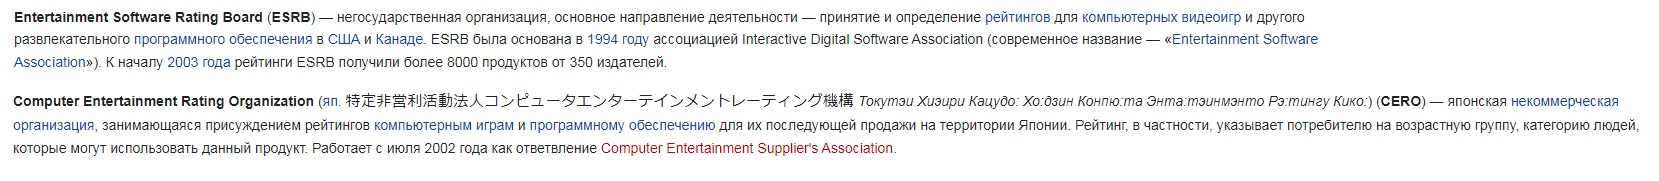

<font color="green" size="5">**Вывод:**</font>      
**Среднестатистическим пользователем Северной Америки является геймер, играющий в Shooter с рейтингом "М" на консоли "PS4"**   
**Среднестатистическим пользователем Европы является геймер, играющий в Shooter с рейтингом "М" на консоли "PS4"**    
**Среднестатистическим пользователем Японии является геймер, играющий в RPG без рейтинга на консоли "3DS"**

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Н0:** *Средние пользовательские рейтинги платформ Xbox One и PC равны*     
**Н1:** *Средние пользовательские рейтинги платформ Xbox One и PC не равны*

In [110]:
data_xbox = actual.query(' platform == "XOne" and user_score.notna()')['user_score']
data_pc = actual.query(' platform == "PC" and user_score.notna()')['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_xbox, data_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<font color="green" size="5">**Вывод:**</font>      
**Средние значения очень близки. Так что, действительно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Н0:** *Средние пользовательские рейтинги жанров Action и Sports равны*     
**Н1:** *Средние пользовательские рейтинги жанров Action и Sports не равны*

In [111]:
data_action  = actual.query('genre == "Action" and user_score.notna()')['user_score']
data_sports = actual.query('genre == "Sports" and user_score.notna()')['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_action, data_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


<font color="green" size="5">**Вывод:**</font>      
**Средние пользовательские рейтинги жанров Action и Sports разные**

## Общий вывод

**В пункте 1:**    
+ изучили основные проблемы в данных   
     
**В пункте 2:**    
1. Исправили названия столбцов     
2. Обработаны пропуски:        
3. Изменены типы данных:      
4. Добавлен столбец по суммарным продажам       
     
**В пункте 3:**    
1. Посчитали количество игр в разные годы, построили график.        
2. Посчитали продажи по платформам, визуализировали результат.     
3. Выбрали актуальный период для прогнозирования на 2017 год       
4. Построли график «ящик с усами» по глобальным продажам игр в разбивке по платформам.     
5. Оценили влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков      
6. Построили распределение игр по жанрам

**В пункте 4:**    
1. Выявили самые популярные платформы по регионам    
2. Выявили самые популярные жанры по регионам      
3. Выявилм влияение рейтинга ESRB на продажи в отдельном регионе     

**В пункте 5:**    
+ проверили гипотезы     
         
**Вывод:**     
Существует зависимость успешности игры от:     
1. популярности пплатформы   
2. отзывов критиков     
3. жанра игры      
4. региона продаж       

**Значит, чтобы игра была успешной, нужно делать ставку в Северной Америке на PS4 или XОne, жанр - Shooter или Platform, возрастная категория старше 17 лет. В Европе на PS4 или XОne, жанр - Shooter или Platform, возрастная категория старше 17 лет. В Японии на 3DS или PS4, жанр - RPG или Fighting, без рейтинга ESRB. Также, чтобы игра получала высокие оценки критиков. Важно учитывать выходы консолей нового поколения и делать ставку на них.**